## Diabetes prediction using machine learning (4 algorithms)

In this article we will be predicting that whether the patient have diabetes or not basis on the features we will provide to our machine learning model and for that we will be using famous Pima Indians Diabetes Database - https://www.kaggle.com/uciml/pima-indians-diabetes-database


1. Data analysis : Here one will get to know about how the data analysis part is done in a data science life cycle.
2. Exploratory data analysis : EDA is one of the most important step in data science project life cycle and here one will need to know that how to make inferences from the visualizations and data analysis
3. Model building : Here we will be using 4 ML models and then we will choose the best performing model.
4. Saving model : Saving the best model using pickle to make the prediction from real data.
5. Model Deployment: Using Streamlit to build interactive website. 

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Here we will be reading the dataset which is in the csv format

In [5]:
diabetes_df = pd.read_csv(r'https://github.com/Yantra-Byte/Dataset/raw/main/Diabetes.csv')

In [6]:
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploratory Data Analysis (EDA)

In [7]:
# Now let' see that what are the columns available in our dataset.
diabetes_df.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [8]:
# Information about the dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# To know more about the dataset
diabetes_df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Now let's check that if our dataset have null values or not
diabetes_df.isnull().head(10)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [11]:
# Now let's check that if our dataset have null values or not
diabetes_df.isnull().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

Here from above code we first checked that is there any null values from isnull() function then we are going to take the sum of all those missing values from sum() function and the inference we now get is that there are no missing values but that is actually not a true story as in this particular dataset all the missing values were given the 0 as value which is not good for the authenticity of the dataset.
Hence we will first replace the 0 value to NAN value then start the imputation process.

In [12]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['glucose','diastolic','triceps','insulin','bmi']] = diabetes_df_copy[[ 'glucose','diastolic','triceps','insulin','bmi']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

pregnancies      0
glucose          5
diastolic       35
triceps        227
insulin        374
bmi             11
dpf              0
age              0
diabetes         0
dtype: int64


As mentioned above that now we will be replacing the zeros with the NAN values so that we can impute it later to maintain the authenticity of the dataset as well as trying to have better Imputation approach i.e to apply mean values of each column to the null values of the respectove columns.

### Data Visualization

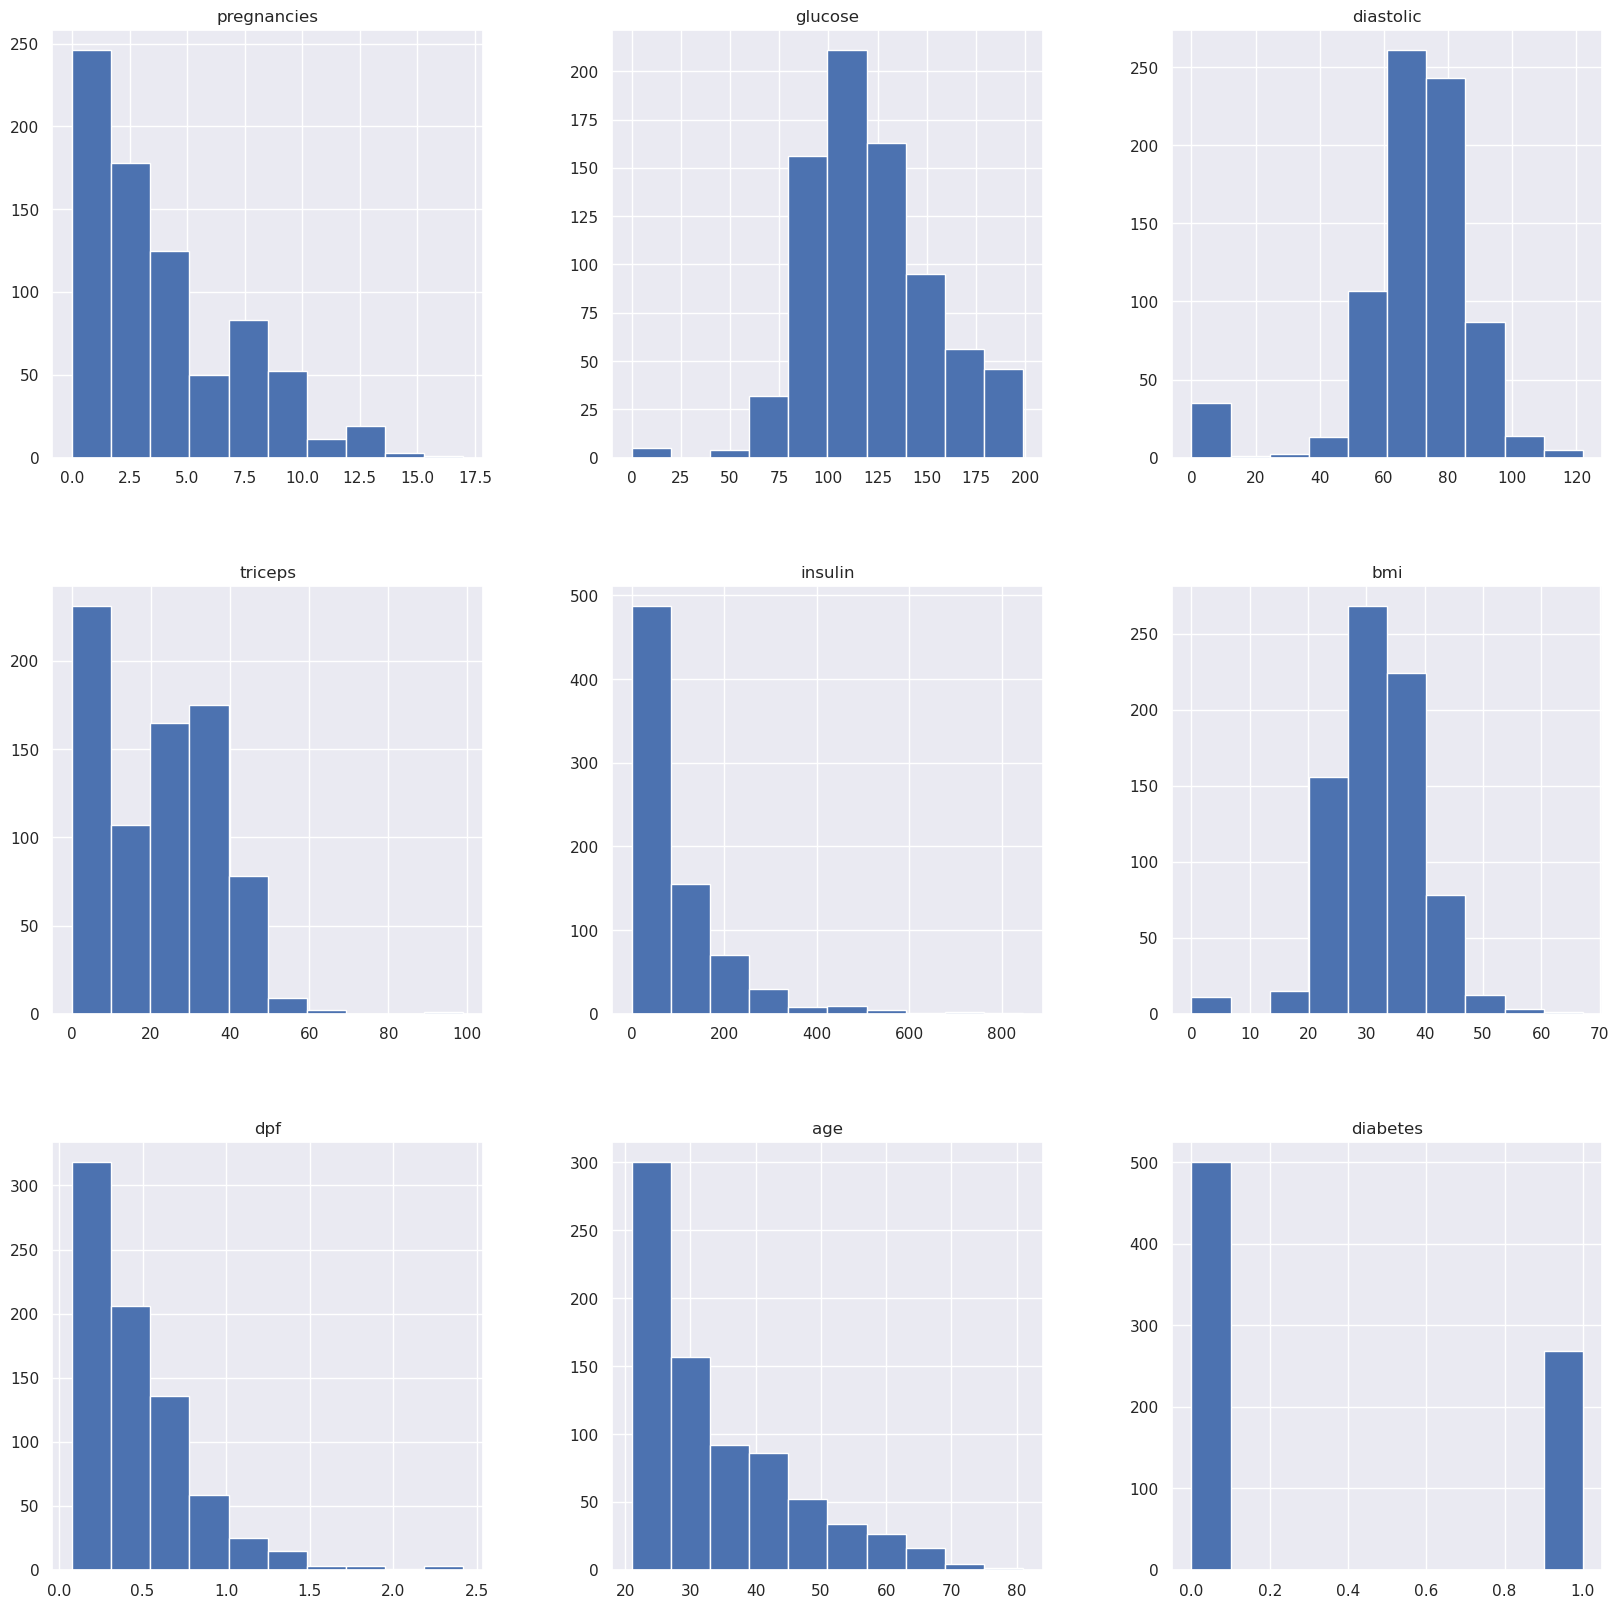

In [13]:
# Plotting the data distribution plots before removing null values 
p = diabetes_df.hist(figsize = (20,20))

So here we have seen the distribution of each features whether it is dependent data aur independent data and one thing which could always strikes that why do we need to see the distribution of data ? So the ans is simple it is the best way to start the analysis of the dataset as it shows the occurence of evry kind of value in the graphical structure which in turn let us know the range of the data 

In [14]:
# Now we will be imputing the mean value of the column to each missing value of that particular column
diabetes_df_copy['glucose'].fillna(diabetes_df_copy['glucose'].mean(), inplace = True)
diabetes_df_copy['diastolic'].fillna(diabetes_df_copy['diastolic'].mean(), inplace = True)
diabetes_df_copy['triceps'].fillna(diabetes_df_copy['triceps'].median(), inplace = True)
diabetes_df_copy['insulin'].fillna(diabetes_df_copy['insulin'].median(), inplace = True)
diabetes_df_copy['bmi'].fillna(diabetes_df_copy['bmi'].median(), inplace = True)

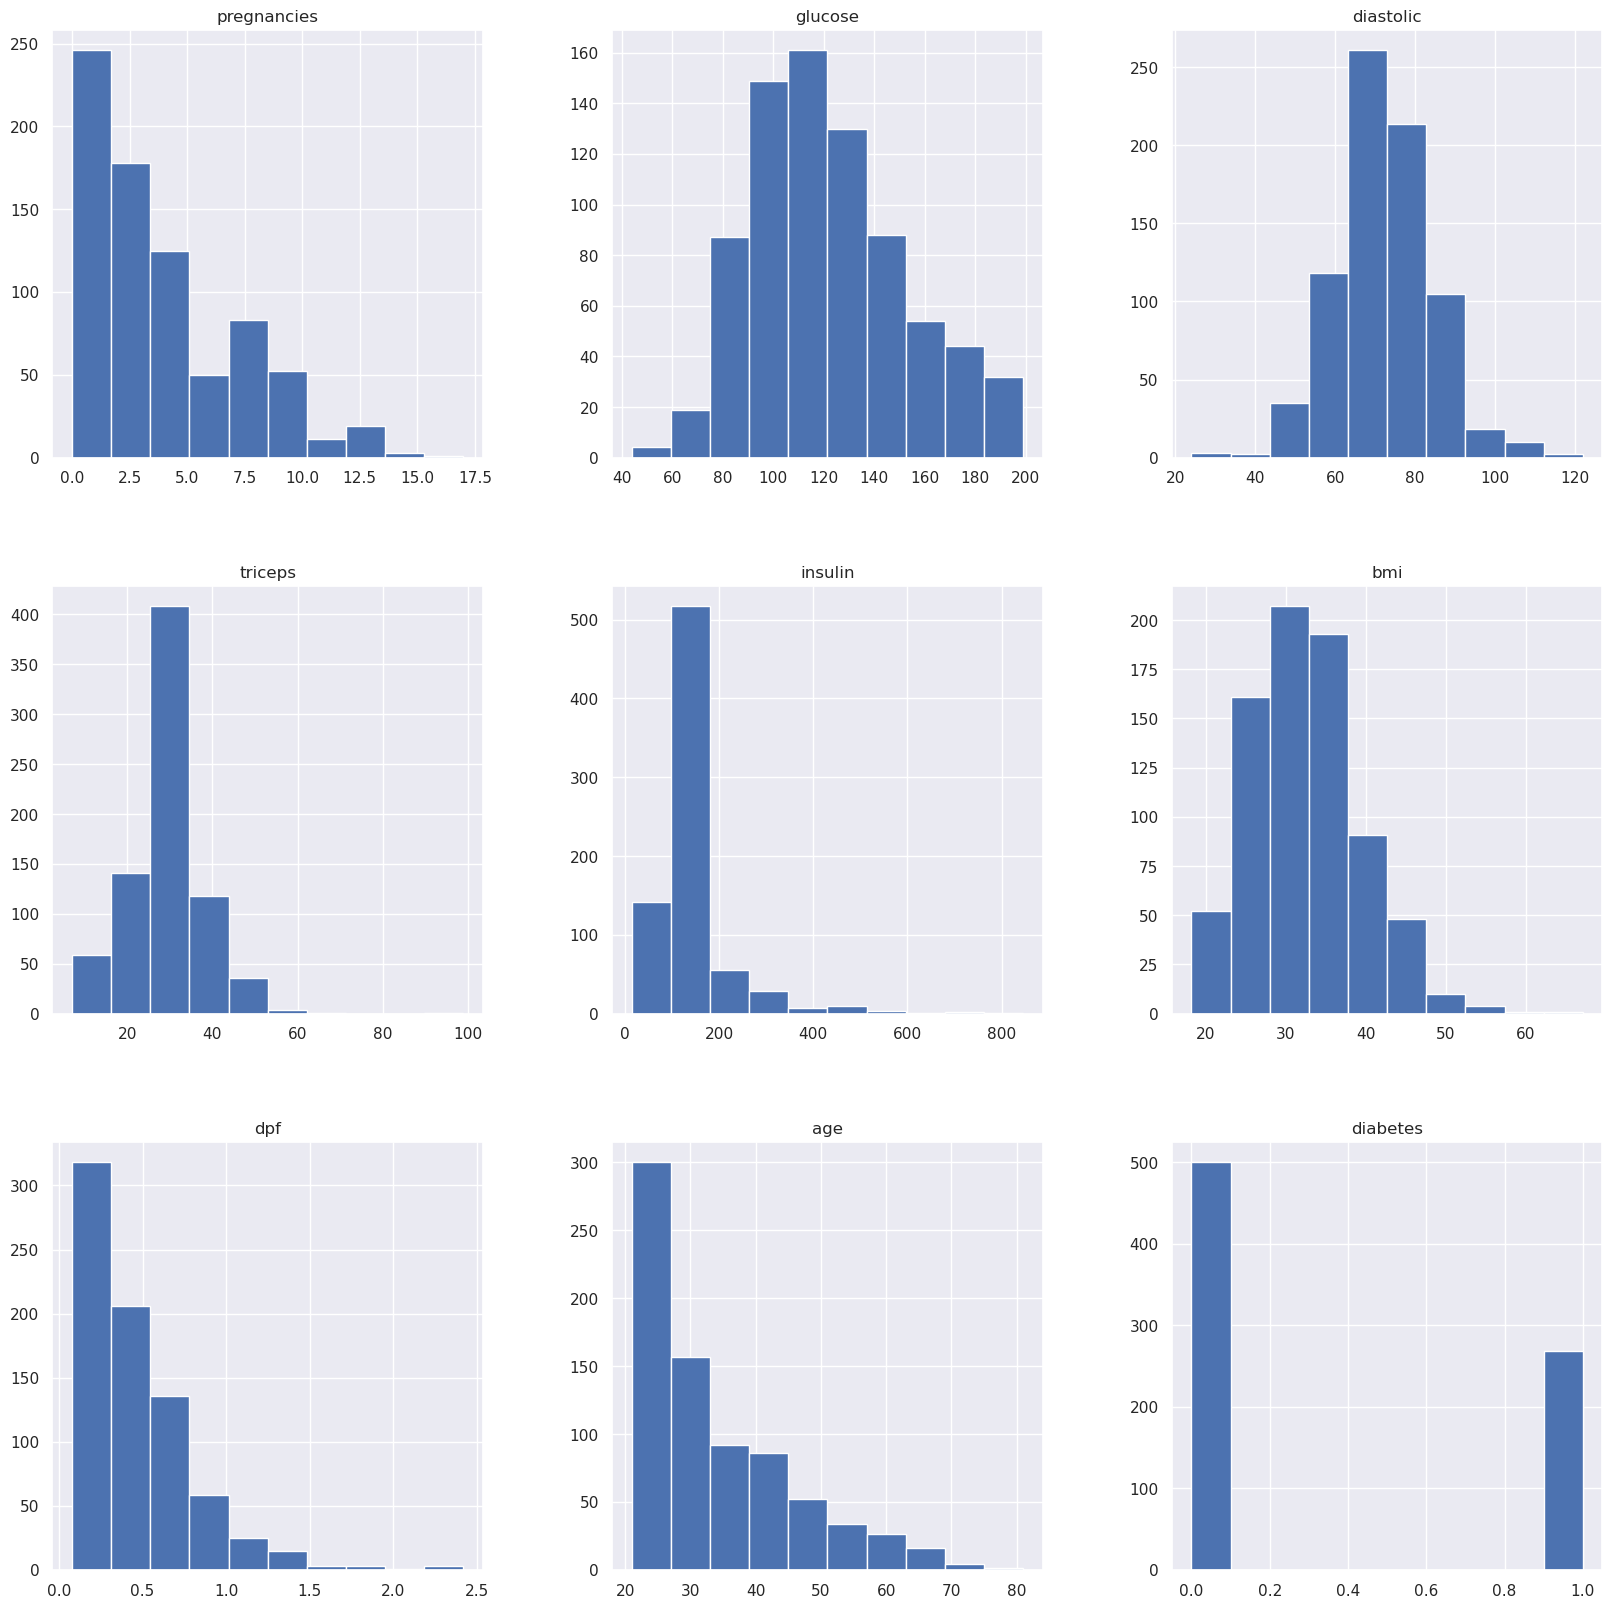

In [15]:
# Plotting the distributions after removing the NAN values
p = diabetes_df_copy.hist(figsize = (20,20))

Here we are again using the hist plot to see the distribution of the dataset but this time we are using this visualization to see the changes that we can see after those null values are removed from the dataset and we can clearly see the difference for example - In age column after removal of the null values we can see that there is a spike at the range of 50 to 100 which is quite logical as well.

Inference : Now in the above graph also we can clearly see that there are no null values in the dataset

0    500
1    268
Name: diabetes, dtype: int64


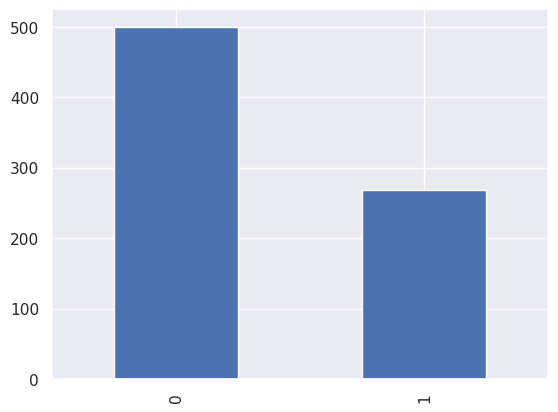

In [18]:
# Now, let's check that how well our outcome column is balanced
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["diabetes"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.diabetes.value_counts())
p=diabetes_df.diabetes.value_counts().plot(kind="bar")

Inference : Here from the above visualization it is clearly visible that our dataset is completely imbalanced infact the number of patient who is diabetic is half of the patients who are non-diabetic

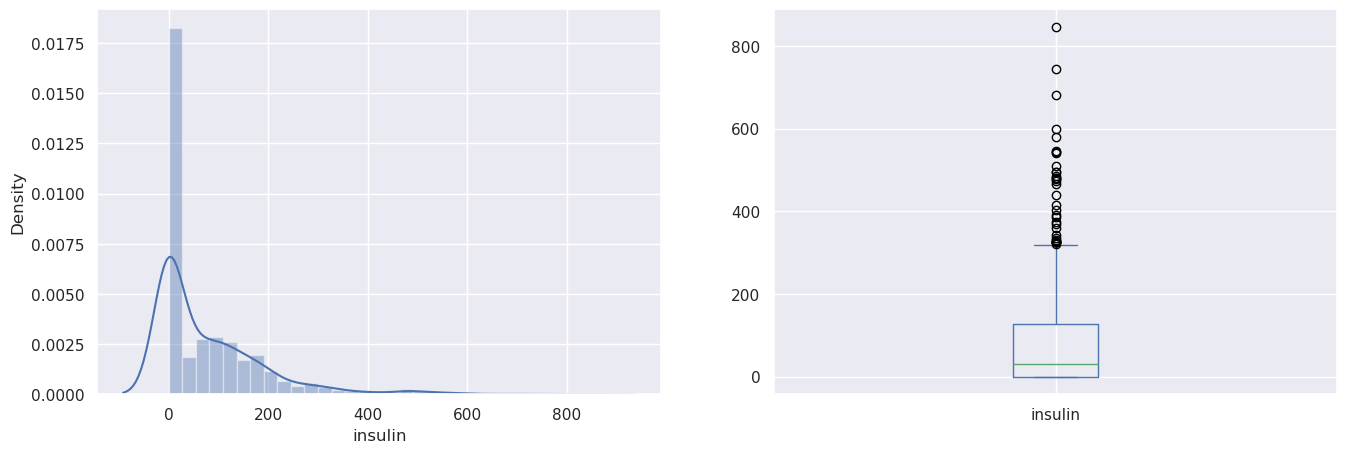

In [19]:
plt.subplot(121), sns.distplot(diabetes_df['insulin'])
plt.subplot(122), diabetes_df['insulin'].plot.box(figsize=(16,5))
plt.show()

That's how distplot can be helpful where one will able to see the distribution of the data as well as with the help of boxplot one can see the outliers in that column and other information too which can be derieved by the box and whiskers plot

### Correlation between all the features

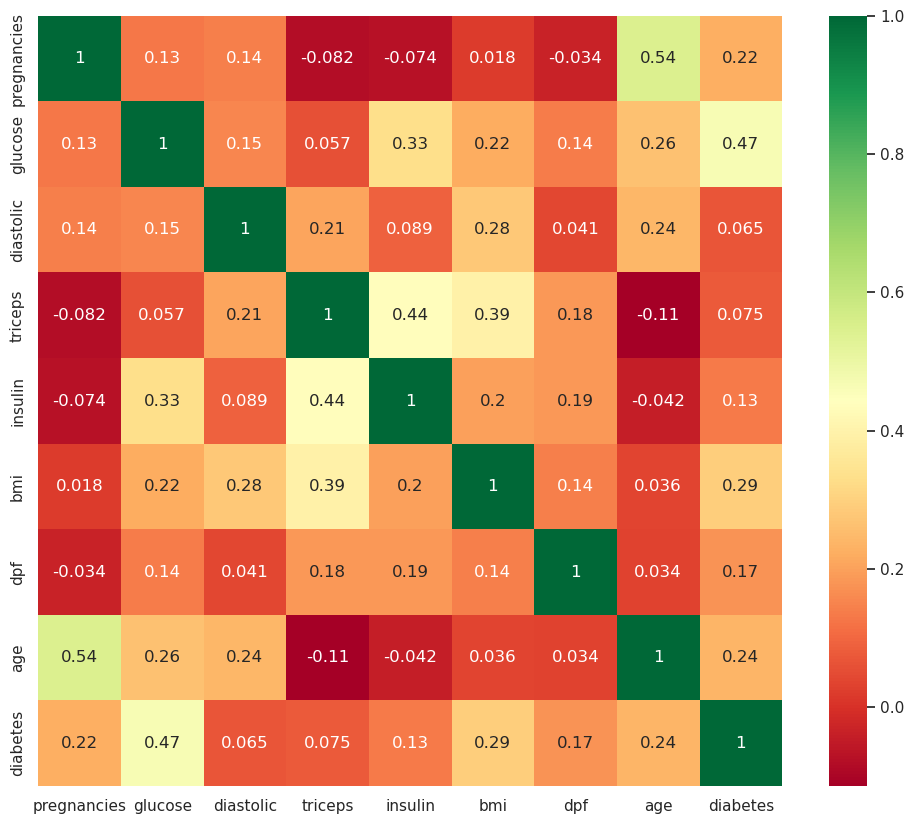

In [20]:
# Correlation between all the features before cleaning
plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has an easy method to showcase heatmap

### Scaling the data

In [21]:
diabetes_df_copy.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [22]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["diabetes"],axis = 1),), columns=['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age'])
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


That's how our dataset will be looking like when it is scaled down or we can see every value now is on the same scale which will help our ML model to give better result

In [23]:
y = diabetes_df_copy.diabetes

In [24]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

# Model Building

### Splitting the dataset

In [25]:
#Splitting the dataset

X = diabetes_df.drop('diabetes', axis=1)
y = diabetes_df['diabetes']

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

In [28]:
#Check columns with zero values - checking this time so that right data should go for model training

print("Total number of rows: {0}", format(len(diabetes_df)))
print("Number of rows missing Pregnancies: {0}",
      format(len(diabetes_df.loc[diabetes_df['pregnancies']==0])))
print("Number of rows missing Glucose: {0}"
      , format(len(diabetes_df.loc[diabetes_df['glucose']==0])))
print("Number of rows missing BloodPressure: {0}",
      format(len(diabetes_df.loc[diabetes_df['diastolic']==0])))
print("Number of rows missing SkinThickness: {0}",
      format(len(diabetes_df.loc[diabetes_df['triceps']==0])))
print("Number of rows missing Insulin: {0}",
      format(len(diabetes_df.loc[diabetes_df['insulin']==0])))
print("Number of rows missing BMI: {0}",
      format(len(diabetes_df.loc[diabetes_df['bmi']==0])))
print("Number of rows missing DiabetesPedigreeFunction: {0}",
      format(len(diabetes_df.loc[diabetes_df['dpf']==0])))
print("Number of rows missing Age: {0}", format(len(diabetes_df.loc[diabetes_df['age']==0])))

Total number of rows: {0} 768
Number of rows missing Pregnancies: {0} 111
Number of rows missing Glucose: {0} 5
Number of rows missing BloodPressure: {0} 35
Number of rows missing SkinThickness: {0} 227
Number of rows missing Insulin: {0} 374
Number of rows missing BMI: {0} 11
Number of rows missing DiabetesPedigreeFunction: {0} 0
Number of rows missing Age: {0} 0


In [29]:
#Imputing zeros values in the dataset

from sklearn.impute import SimpleImputer
import numpy as np

fill_values = SimpleImputer(missing_values=0, strategy='mean')
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [30]:
#Builidng the model using RandomForest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [31]:
# On training data
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [32]:
predictions = rfc.predict(X_test)

In [33]:
#Getting the accuracy score for Random Forest

from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7637795275590551


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[132  30]
 [ 30  62]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       162
           1       0.67      0.67      0.67        92

    accuracy                           0.76       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.76      0.76      0.76       254



In [35]:
#Building the model using DecisionTree

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
predictions = dtree.predict(X_test)

In [37]:
#Getting the accuracy score for Decision Tree

from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7559055118110236


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[126  36]
 [ 26  66]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       162
           1       0.65      0.72      0.68        92

    accuracy                           0.76       254
   macro avg       0.74      0.75      0.74       254
weighted avg       0.76      0.76      0.76       254



In [39]:
#Building model using XGBoost

from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [40]:
xgb_pred = xgb_model.predict(X_test)

In [41]:
#Getting accuracy score for XGBoost

from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.7401574803149606


In [42]:
#Metrics for XGBoost
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test,xgb_pred))

[[127  35]
 [ 31  61]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       162
           1       0.64      0.66      0.65        92

    accuracy                           0.74       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.74      0.74      0.74       254



In [43]:
#Building the model using Support Vector Machine (SVM)

from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [44]:
#Predict
svc_pred = svc_model.predict(X_test)

In [45]:
#Accuracy score for SVM
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7401574803149606


In [46]:
#Metrics for SVM
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[143  19]
 [ 47  45]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       162
           1       0.70      0.49      0.58        92

    accuracy                           0.74       254
   macro avg       0.73      0.69      0.69       254
weighted avg       0.73      0.74      0.73       254



# Conclusion from model building

Therefore Random forest is the best model for this prediction since it has an accuracy_score of 0.76

In [47]:
#Getting feature importances
rfc.feature_importances_

array([0.07335676, 0.25856977, 0.08778778, 0.07693595, 0.08780756,
       0.15311281, 0.12743356, 0.1349958 ])

<AxesSubplot:>

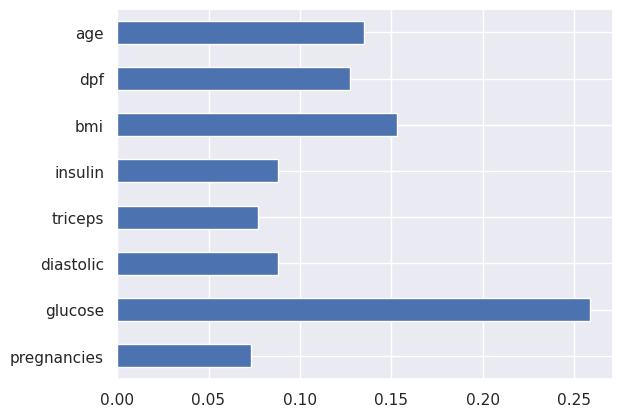

In [48]:
#Plotting feature importances
(pd.Series(rfc.feature_importances_, index=X.columns)
   .plot(kind='barh'))  

Here from the above graph it is clearly visible that Glucose as a feature has the most importance in this dataset.

In [49]:
#Printing prediction probabilities for the test data
print('Prediction Probabilities')
rfc.predict_proba(X_test)

Prediction Probabilities


array([[0.945, 0.055],
       [0.14 , 0.86 ],
       [0.545, 0.455],
       [0.835, 0.165],
       [0.39 , 0.61 ],
       [0.4  , 0.6  ],
       [0.9  , 0.1  ],
       [0.89 , 0.11 ],
       [0.2  , 0.8  ],
       [0.82 , 0.18 ],
       [0.085, 0.915],
       [0.915, 0.085],
       [0.255, 0.745],
       [0.075, 0.925],
       [0.685, 0.315],
       [0.765, 0.235],
       [0.81 , 0.19 ],
       [0.475, 0.525],
       [0.805, 0.195],
       [0.625, 0.375],
       [0.52 , 0.48 ],
       [0.825, 0.175],
       [0.22 , 0.78 ],
       [0.385, 0.615],
       [0.805, 0.195],
       [0.93 , 0.07 ],
       [0.925, 0.075],
       [0.405, 0.595],
       [0.36 , 0.64 ],
       [0.665, 0.335],
       [0.37 , 0.63 ],
       [0.825, 0.175],
       [0.595, 0.405],
       [0.485, 0.515],
       [0.94 , 0.06 ],
       [0.43 , 0.57 ],
       [0.415, 0.585],
       [0.735, 0.265],
       [0.275, 0.725],
       [0.535, 0.465],
       [0.155, 0.845],
       [0.245, 0.755],
       [0.265, 0.735],
       [1. 

## Saving model

In [55]:
import pickle
pickle.dump(rfc,open('rfc_model.p','wb'))

In [ ]:
import pickle
 
# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)

In [50]:
# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)
 
# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1])

In [51]:
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
diabetes_df.tail()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [53]:
# putting datapoints in the model it will either return 0 or 1 i.e. person suffering from diabetes or not
rfc.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient

array([1])

In [54]:
# putting datapoints in the model it will either return 0 or 1 i.e. person suffering from diabetes or not
rfc.predict([[10,101,76,48,180,32.9,0.171,63]])  # 763 th patient

array([0])

### Conclusion

After using all these these patient records, we are able to build a machine learning model to accurately predict whether or not the patients in the dataset is diabetic or not.